In [1]:
import os

import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
TRAIN_DIR = '../input/train/'
TEST_DIR = '../input/test1/'

In [7]:
train_image_file_names = [TRAIN_DIR + i for i in os.listdir(TRAIN_DIR)]
test_image_file_names = [TEST_DIR + i for i in os.listdir(TEST_DIR)]
print(train_image_file_names[:20])
print(test_image_file_names[:10])

['../input/train/cat.0.jpg', '../input/train/cat.1.jpg', '../input/train/cat.10.jpg', '../input/train/cat.100.jpg', '../input/train/cat.1000.jpg', '../input/train/cat.10000.jpg', '../input/train/cat.10001.jpg', '../input/train/cat.10002.jpg', '../input/train/cat.10003.jpg', '../input/train/cat.10004.jpg', '../input/train/cat.10005.jpg', '../input/train/cat.10006.jpg', '../input/train/cat.10007.jpg', '../input/train/cat.10008.jpg', '../input/train/cat.10009.jpg', '../input/train/cat.1001.jpg', '../input/train/cat.10010.jpg', '../input/train/cat.10011.jpg', '../input/train/cat.10012.jpg', '../input/train/cat.10013.jpg']
['../input/test1/1.jpg', '../input/test1/10.jpg', '../input/test1/100.jpg', '../input/test1/1000.jpg', '../input/test1/10000.jpg', '../input/test1/10001.jpg', '../input/test1/10002.jpg', '../input/test1/10003.jpg', '../input/test1/10004.jpg', '../input/test1/10005.jpg']


In [8]:
labels = [1 if 'dog' in name else 0 for name in train_image_file_names]
print(sum(labels))

12500


In [9]:
def decode_image(image_file_names, resize_func=None):
    
    images = []
    
    graph = tf.Graph()
    with graph.as_default():
        file_name = tf.placeholder(dtype=tf.string)
        file = tf.read_file(file_name)
        image = tf.image.decode_jpeg(file)
        if resize_func:
            image = resize_func(image)
    
    with tf.Session(graph=graph) as sess:
        tf.initialize_all_variables().run()   
        for i in range(len(image_file_names)):
            images.append(sess.run(image, feed_dict={file_name: image_file_names[i]}))
            if (i + 1) % 1000 == 0:
                print('Images processed: ', i + 1)
        
        sess.close()
    
    return images

In [10]:
train_images = decode_image(train_image_file_names)
test_images = decode_image(test_image_file_names)
all_images = train_images + test_images

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Images processed:  1000
Images processed:  2000
Images processed:  3000
Images processed:  4000
Images processed:  5000
Images processed:  6000
Images processed:  7000
Images processed:  8000
Images processed:  9000
Images processed:  10000
Images processed:  11000
Images processed:  12000
Images processed:  13000
Images processed:  14000
Images processed:  15000
Images processed:  16000
Images processed:  17000
Images processed:  18000
Images processed:  19000
Images processed:  20000
Images processed:  21000
Images processed:  22000
Images processed:  23000
Images processed:  24000
Images processed:  25000
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Images processed:  1000
Images processed:  2000
Images processed:  3000
Images processed:  4000
Images processed:  5000
Images processed:  6000
Images processed:  7000
Images processed:  8000
Images processed:  9000
Images processed:  1

In [11]:
width = []
height = []
aspect_ratio = []
for image in all_images:
    h, w, d = np.shape(image)
    aspect_ratio.append(float(w) / float(h))
    width.append(w)
    height.append(h)

Mean aspect ratio:  1.15641061479


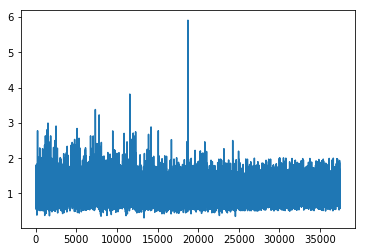

In [12]:
print('Mean aspect ratio: ',np.mean(aspect_ratio))
plt.plot(aspect_ratio)
plt.show()

Mean width: 404.140853333
Mean height: 360.295626667


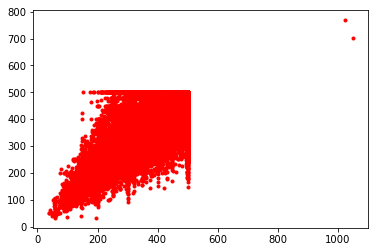

In [13]:
print('Mean width:',np.mean(width))
print('Mean height:',np.mean(height))
plt.plot(width, height, '.r')
plt.show()

In [14]:
del train_images
del test_images
del all_images

In [15]:
WIDTH=500
HEIGHT=500
resize_func = lambda image: tf.image.resize_image_with_crop_or_pad(image, HEIGHT, WIDTH)

In [16]:
processed_train_images = decode_image(train_image_file_names, resize_func=resize_func)
processed_test_images = decode_image(test_image_file_names, resize_func=resize_func)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Images processed:  1000
Images processed:  2000
Images processed:  3000
Images processed:  4000
Images processed:  5000
Images processed:  6000
Images processed:  7000
Images processed:  8000
Images processed:  9000
Images processed:  10000
Images processed:  11000
Images processed:  12000
Images processed:  13000
Images processed:  14000
Images processed:  15000
Images processed:  16000
Images processed:  17000
Images processed:  18000
Images processed:  19000
Images processed:  20000
Images processed:  21000
Images processed:  22000
Images processed:  23000
Images processed:  24000
Images processed:  25000
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Images processed:  1000
Images processed:  2000
Images processed:  3000
Images processed:  4000
Images processed:  5000
Images processed:  6000
Images processed:  7000
Images processed:  8000
Images processed:  9000
Images processed:  1

In [17]:
print(np.shape(processed_train_images))
print(np.shape(processed_test_images))

(25000, 500, 500, 3)
(12500, 500, 500, 3)


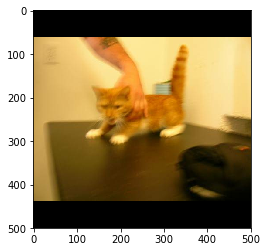

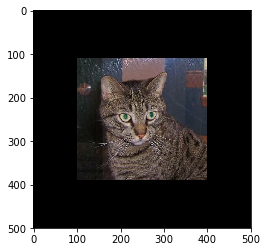

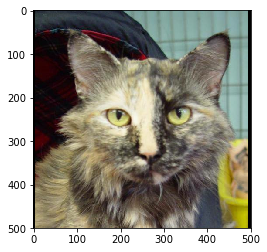

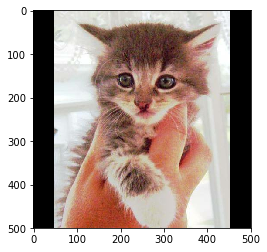

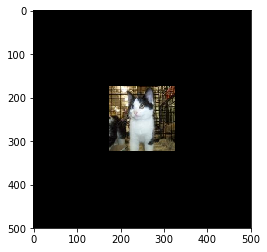

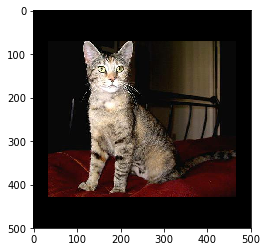

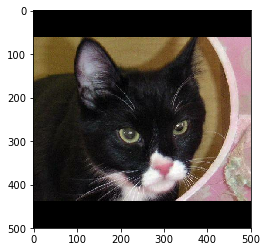

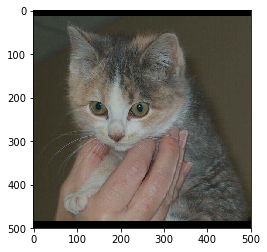

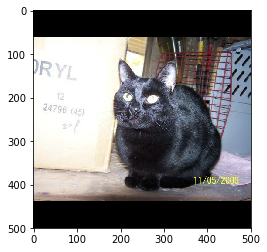

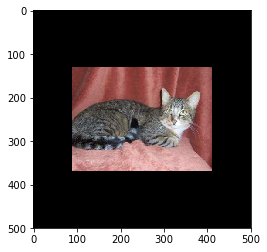

In [18]:
for i in range(10):
    plt.imshow(processed_train_images[i])
    plt.show()

In [19]:
del processed_train_images
del processed_test_images